### CS4622 Mini Kaggle Competition - Multiclass Image Classification
#### Author: Sabine Hollatz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# %tensorflow_version 2.x
import tensorflow as tf

import seaborn as sns

In [2]:
X_train = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/X_train.npy')
y_train = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/y_train.npy')
X_test = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/X_test.npy')
print("Number of samples: {}, number of classes: {}".format(y_train.shape[0], y_train.shape[1]))
print("image size: {}x{}x{}".format(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

Number of samples: 39209, number of classes: 43
image size: 32x32x3


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    data_format = "channels_last")

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    data_format = "channels_last")

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(43, activation='softmax'))
    
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.categorical_accuracy])

In [6]:
epochs = 100
batchsize = 64
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batchsize), 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=batchsize),
                    steps_per_epoch=len(X_train) / batchsize,
                    shuffle=True,
                    callbacks=[callback],
                    epochs=epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 490.109375 steps, validate for 123 steps
Epoch 1/100
491/490 [==============================] - 3s 7ms/step - loss: 2.0034 - categorical_accuracy: 0.4844 - val_loss: 1.2566 - val_categorical_accuracy: 0.6330
Epoch 2/100
491/490 [==============================] - 3s 6ms/step - loss: 0.8639 - categorical_accuracy: 0.7680 - val_loss: 0.7061 - val_categorical_accuracy: 0.8147
Epoch 3/100
491/490 [==============================] - 3s 6ms/step - loss: 0.6126 - categorical_accuracy: 0.8371 - val_loss: 0.5033 - val_categorical_accuracy: 0.8732
Epoch 4/100
491/490 [==============================] - 3s 6ms/step - loss: 0.4852 - categorical_accuracy: 0.8710 - val_loss: 0.3833 - val_categorical_accuracy: 0.9028
Epoch 5/100
491/490 [==============================] - 4s 7ms/step - loss: 0.4137 - categorical_accuracy: 0.8900 - val_loss: 0.4962 - val_categorical_accuracy: 0.8669
Epoch 6/100
491/490 [==============================] - 3s 6ms/st

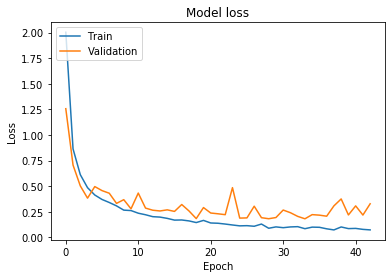

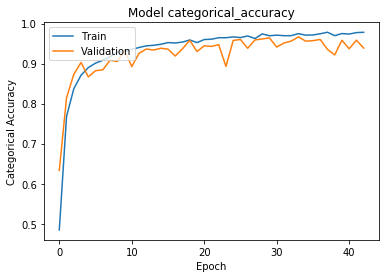

In [7]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model categorical_accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
predictions = model.predict(X_test)

In [9]:
preds_to_submit = pd.DataFrame(predictions.astype('int'))
preds_to_submit

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12628,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
preds_to_submit.to_csv("./shallow_network_predictions.csv")